In [1]:
# Gọi các thư viện sử dụng
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Đọc dữ liệu 
data_raw = pd.read_csv("C:/Users/minht/Dropbox/PC/Desktop/project/cafe_revenue.csv")
C:\Users\minht\Dropbox\PC\Desktop\project\cafe_revenue.csv
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393933 entries, 0 to 1393932
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   transaction_id    1393933 non-null  int64 
 1   transaction_date  1393933 non-null  object
 2   transaction_time  1393933 non-null  object
 3   transaction_qty   1393933 non-null  int64 
 4   store_id          1393933 non-null  object
 5   store_location    1393933 non-null  object
 6   product_id        1393933 non-null  object
 7   unit_price        1393933 non-null  int64 
 8   product_type      1393933 non-null  object
 9   product_category  1393933 non-null  object
 10  product_detail    1393376 non-null  object
 11  online_order      1393933 non-null  bool  
dtypes: bool(1), int64(3), object(8)
memory usage: 118.3+ MB


In [3]:
data_raw.head(5)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_type,product_category,product_detail,online_order
0,25795,2019-01-01,10:59,2,S01,Hà Nội,latte,50000,Đồ uống,cafe,Latte,False
1,25795,2019-01-01,10:59,2,S01,Hà Nội,espresso,50000,Đồ uống,cafe,Espresso,False
2,25795,2019-01-01,10:59,2,S01,Hà Nội,bac_siu,35000,Đồ uống,cafe,Bạc sỉu,False
3,25795,2019-01-01,10:59,2,S01,Hà Nội,latte,50000,Đồ uống,cafe,Latte,False
4,25795,2019-01-01,10:59,2,S01,Hà Nội,espresso,50000,Đồ uống,cafe,Espresso,False


In [4]:
data_raw.tail(5)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_type,product_category,product_detail,online_order
1393928,42983,2023-12-31,20:16,2,S01,Hà Nội,cacao_nong,40000,Đồ uocommerce,cafe,Cacao nóng,False
1393929,42983,2023-12-31,20:16,1,S01,Hà Nội,bac_siu,35000,Đồ uống,cafe,Bạc sỉu,False
1393930,42983,2023-12-31,20:16,1,S01,Hà Nội,bac_siu,35000,Đồ uống,cafe,Bạc sỉu,False
1393931,42983,2023-12-31,20:16,1,S01,Hà Nội,duongden_suada,40000,Đồ uống,cafe,Đường đen sữa đá,False
1393932,42983,2023-12-31,20:16,2,S01,Hà Nội,cappuccino,55000,Đồ uống,cafe,Cappuccino,False


In [5]:
data_raw.sample(10)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_type,product_category,product_detail,online_order
648563,19619,2021-08-12,10:34,1,S01,Hà Nội,cappuccino,55000,Đồ uống,cafe,Cappuccino,True
1324612,71582,2023-10-28,10:05,2,S01,Hà Nội,cafe_den,30000,Đồ uống,cafe,Cafe đen,False
847123,22513,2022-04-08,12:59,2,S01,Hà Nội,cacao_nong,40000,Đồ uocommerce,cafe,Cacao nóng,False
1320892,88819,2023-10-23,12:52,2,S01,Hà Nội,cacao_nong,40000,Đồ uocommerce,cafe,Cacao nóng,False
712546,92922,2021-12-07,14:15,1,S01,Hà Nội,espresso,50000,Đồ uống,cafe,Espresso,False
411851,60109,2020-04-23,9:47,1,S01,Hà Nội,duongden_suada,40000,Đồ uống,cafe,Đường đen sữa đá,True
1346251,48748,2023-11-17,11:13,1,S01,Hà Nội,americano,45000,Đồ uống,cafe,Americano,False
793016,32126,2022-02-19,18:43,1,S01,Hà Nội,cafe_suada,30000,Đồ uống,cafe,Cafe sữa đá,False
298101,65866,2019-12-08,20:39,2,S01,Hà Nội,cafe_den,30000,Đồ uống,cafe,Cafe đen,False
471622,29799,2020-10-01,14:10,1,S01,Hà Nội,duongden_suada,40000,Đồ uống,cafe,Đường đen sữa đá,True


## 1. Trong Dataset các thuộc tính có kiểu dữ liệu định tính (Qualitative Data):
1.1 Định tính/Định danh (Nominal Data):
transaction_id, transaction_date, transaction_time, store_id, store_location, product_id, product_type, product_category, product_detail

1.2 Định tính/Nhị phân (Binary Data):
online_order

1.3 Định lượng/Rời rạc (Discrete Data):
transaction_qty


## 2. Trong Dataset các thuộc tính có kiểu dữ liệu định lượng (Quantitative Data):
2.1 Định lượng/Liên tục (Continuous Data):
unit_price

Không có dữ liệu Định tính/Trật tự (Ordinal Data) trong trường hợp này.

In [6]:
data_raw.describe()

,transaction_id,transaction_qty,unit_price
count,1.393933e+06,1.393933e+06,1.393933e+06
mean,5.505220e+04,1.459117e+00,4.026899e+04
std,2.601522e+04,4.983260e-01,9.846291e+03
min,1.000000e+04,1.000000e+00,1.000000e+04
25%,3.252500e+04,1.000000e+00,3.000000e+04
50%,5.507700e+04,1.000000e+00,4.000000e+04
75%,7.762200e+04,2.000000e+00,5.000000e+04
max,9.999800e+04,2.000000e+00,5.500000e+04


## Xác định hệ số tương quan của: 
1. transaction_qty và unit_price
2. online_order và transaction_qty

In [7]:
# Xác định mối tương quan của transaction_qty và unit_price
r1 = data_raw['transaction_qty'].corr(data_raw['unit_price'])
print('Độ tương quan của số lượng giao dịch và giá của giá của sản phẩm: ', r1)

Độ tương quan của số lượng giao dịch và giá của giá của sản phẩm:  0.1307071845816761


In [8]:
# Xác định mối tương quan của online_order và transaction_qty
r2 = data_raw['online_order'].corr(data_raw['transaction_qty'])
print('Độ tương quan của đặt hàng online và số lượng giao dịch: ', r2)

Độ tương quan của đặt hàng online và số lượng giao dịch:  -0.0008359937606784149


## Làm sạch dữ liệu

### 1. Xử lý dữ liệu missing

In [9]:
data1 = data_raw.copy()

In [10]:
data1.isnull().sum()

transaction_id        0
transaction_date      0
transaction_time      0
transaction_qty       0
store_id              0
store_location        0
product_id            0
unit_price            0
product_type          0
product_category      0
product_detail      557
online_order          0
dtype: int64

In [11]:
#Thống kê số giá trị missing và tỷ lệ missing
def missing_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Số giá trị Missing', 1 : 'Tỷ lệ % missing'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        'Tỷ lệ % missing', ascending=False).round(4)
        print ("File dữ liệu bao gồm có: " + str(df.shape[1]) + " cột.\n"      
            "Có " + str(mis_val_table_ren_columns.shape[0]) +
              " cột chứa missing values.")
        return mis_val_table_ren_columns

#Check dữ liệu missing trong DataFrame: 
missing_values(data1)

File dữ liệu bao gồm có: 12 cột.
Có 1 cột chứa missing values.


,Số giá trị Missing,Tỷ lệ % missing
product_detail,557,0.04


In [12]:
data_raw.duplicated().sum()

142507

In [13]:
data_missing = data1.copy()

In [14]:
data_missing = data_missing.dropna(subset=['product_detail'])
data_missing.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_type        0
product_category    0
product_detail      0
online_order        0
dtype: int64

### 2. Xử lý dữ liệu outlier

In [15]:
data_outlier = data_missing.copy()

In [16]:
data_outlier.describe()

,transaction_id,transaction_qty,unit_price
count,1.393376e+06,1.393376e+06,1.393376e+06
mean,5.505277e+04,1.459112e+00,4.026861e+04
std,2.601529e+04,4.983255e-01,9.846444e+03
min,1.000000e+04,1.000000e+00,1.000000e+04
25%,3.252500e+04,1.000000e+00,3.000000e+04
50%,5.507700e+04,1.000000e+00,4.000000e+04
75%,7.762300e+04,2.000000e+00,5.000000e+04
max,9.999800e+04,2.000000e+00,5.500000e+04


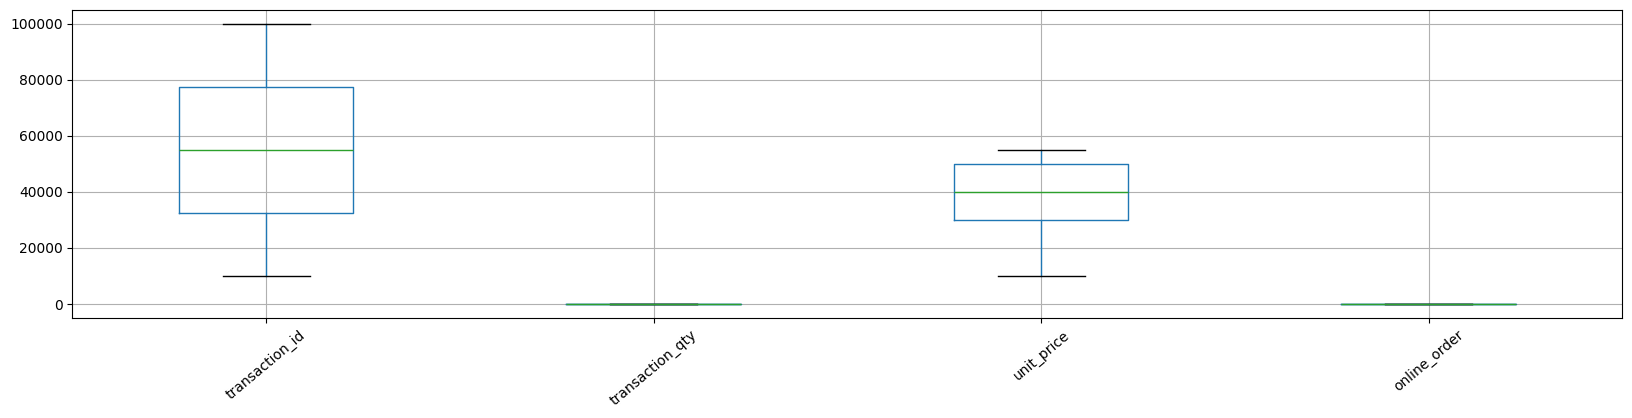

In [17]:
plt.figure(figsize=(20,4))
data_outlier.boxplot()
plt.xticks(rotation=40)
plt.show()

Không có dữ liệu ngoại lai 

### 3. Xử lý dữ liệu duplicate

In [18]:
data_duplicate = data_outlier.copy()

In [19]:
data_duplicate.duplicated().sum()

142507

In [20]:
data_duplicate.drop_duplicates(subset=['transaction_id'], keep='first', inplace= True)

In [21]:
data_duplicate.duplicated().sum()


0

In [22]:
data_duplicate

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_type,product_category,product_detail,online_order
0,25795,2019-01-01,10:59,2,S01,Hà Nội,latte,50000,Đồ uống,cafe,Latte,False
5,72955,2019-01-01,13:42,2,S01,Hà Nội,latte,50000,Đồ uống,cafe,Latte,False
6,93104,2019-01-01,12:55,2,S01,Hà Nội,bac_siu,35000,Đồ uống,cafe,Bạc sỉu,False
11,90038,2019-01-01,10:43,2,S01,Hà Nội,latte,50000,Đồ uống,cafe,Latte,False
15,27159,2019-01-01,11:56,2,S01,Hà Nội,cappuccino,55000,Đồ uống,cafe,Cappuccino,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1393107,95029,2023-12-31,7:40,2,S01,Hà Nội,cafe_den,30000,Đồ uống,cafe,Cafe đen,False
1393277,87234,2023-12-31,17:19,1,S01,Hà Nội,cacao_nong,40000,Đồ uocommerce,cafe,Cacao nóng,False
1393386,89536,2023-12-31,20:54,2,S01,Hà Nội,cacao_nong,40000,Đồ uocommerce,cafe,Cacao nóng,False
1393644,68377,2023-12-31,11:50,1,S01,Hà Nội,cacao_nong,40000,Đồ uocommerce,cafe,Cacao nóng,False


## Phân tích dữ liệu

In [34]:
# Tạo dữ liệu chi tiết về chi phí duy trì quán cafe
data_exspense = {
    'Category': [
        'Nguyên liệu chính', 'Nguyên liệu chính', 'Nguyên liệu chính', 'Nguyên liệu chính', 
        'Nguyên liệu chính', 'Nguyên liệu chính', 'Nguyên liệu chính',
        'Vật tư tiêu hao', 'Vật tư tiêu hao', 'Vật tư tiêu hao', 'Vật tư tiêu hao', 
        'Vật tư tiêu hao', 'Vật tư tiêu hao',
        'Chi phí mua đồ ăn bên ngoài', 'Chi phí mua đồ ăn bên ngoài',
        'Đồ dùng pha chế', 'Đồ dùng pha chế', 'Điện nước', 'Điện nước', 'Marketing và khuyến mại',
        'Thiết bị bảo trì và vệ sinh', 'Thiết bị bảo trì và vệ sinh', 'Nhân sự', 'Nhân sự', 'Nhân sự', 'Nhân sự', 'Nhân sự', 'Nhân sự', 'Nhân sự', 'Nhân sự'
    ],
    'Item': [
        'Cà phê hạt', 'Sữa tươi', 'Trà các loại', 'Đường', 'Hoa quả tươi', 'Chocolate bột', 'Đá viên',
        'Ly nhựa', 'Ống hút/thìa khuấy', 'Khăn giấy', 'Túi giấy/nhựa', 'Nước rửa ly', 'Nước lau sàn',
        'Bánh ngọt', 'Đồ ăn vặt',
        'Máy xay/pha cà phê', 'Dụng cụ pha chế', 'Tiền điện', 'Tiền nước', 'Chi phí marketing',
        'Sửa chữa máy móc', 'Dụng cụ vệ sinh', 'Nhân viên thu ngân', 'Nhân viên pha chế', 'Nhân viên phục vụ', 
        'Bảo vệ', 'Quản lý', 'Nhân viên pha chế (Part time)', 'Nhân viên phục vụ (Part time)', 'Nhân viên thu ngân (Part time)'
    ],
    'Cost (VND)': [
        2000000, 4000000, 1900000, 700000, 2000000, 1800000, 350000, 
        1200000, 700000, 300000, 500000, 500000, 400000,
        1000000, 1000000,
        5000000, 1500000, 2800000, 800000, 2000000,
        1000000, 600000, 4500000, 5000000, 4000000, 5500000, 7000000, 
        2800000, 2400000, 2400000
    ],
    'Frequency': [
        'Hàng tháng', 'Hàng tháng', 'Hàng tháng', 'Hàng tháng', 'Hàng tháng', 'Hàng tháng', 'Hàng tháng',
        'Hàng tháng', 'Hàng tháng', 'Hàng tháng', 'Hàng tháng', 'Hàng tháng', 'Hàng tháng',
        'Hàng tháng', 'Hàng tháng',
        'Nửa năm', 'Nửa năm', 'Hàng tháng', 'Hàng tháng', 'Theo nhu cầu',
        'Nửa năm', 'Nửa năm', 'Hàng tháng', 'Hàng tháng', 'Hàng tháng', 'Hàng tháng', 'Hàng tháng', 
        'Hàng tháng', 'Hàng tháng', 'Hàng tháng'
    ]
}

# Tạo DataFrame
df_costs = pd.DataFrame(data_exspense)

# Hiển thị dữ liệu
df_costs




,Category,Item,Cost (VND),Frequency
0,Nguyên liệu chính,Cà phê hạt,2000000,Hàng tháng
1,Nguyên liệu chính,Sữa tươi,4000000,Hàng tháng
2,Nguyên liệu chính,Trà các loại,1900000,Hàng tháng
3,Nguyên liệu chính,Đường,700000,Hàng tháng
4,Nguyên liệu chính,Hoa quả tươi,2000000,Hàng tháng
5,Nguyên liệu chính,Chocolate bột,1800000,Hàng tháng
6,Nguyên liệu chính,Đá viên,350000,Hàng tháng
7,Vật tư tiêu hao,Ly nhựa,1200000,Hàng tháng
8,Vật tư tiêu hao,Ống hút/thìa khuấy,700000,Hàng tháng
9,Vật tư tiêu hao,Khăn giấy,300000,Hàng tháng


In [24]:
data_holidays = {
    'Holiday': [
        'Tết Dương lịch', 'Tết Nguyên Đán', 'Giỗ Tổ Hùng Vương', 'Ngày Giải Phóng Miền Nam', 
        'Ngày Quốc tế Lao động', 'Quốc khánh Việt Nam', 'Tết Trung Thu', 'Ngày Quốc tế Phụ nữ', 
        'Ngày Phụ nữ Việt Nam', 'Ngày Nhà giáo Việt Nam', 'Ngày Lễ Tình nhân', 'Ngày Halloween', 
        'Giáng sinh'
    ],
    '2019': [
        '2019-01-01', '2019-02-05', '2019-04-14', '2019-04-30', 
        '2019-05-01', '2019-09-02', '2019-09-13', '2019-03-08', 
        '2019-10-20', '2019-11-20', '2019-02-14', '2019-10-31', 
        '2019-12-25'
    ],
    '2020': [
        '2020-01-01', '2020-01-25', '2020-04-02', '2020-04-30', 
        '2020-05-01', '2020-09-02', '2020-10-01', '2020-03-08', 
        '2020-10-20', '2020-11-20', '2020-02-14', '2020-10-31', 
        '2020-12-25'
    ],
    '2021': [
        '2021-01-01', '2021-02-12', '2021-04-21', '2021-04-30', 
        '2021-05-01', '2021-09-02', '2021-09-21', '2021-03-08', 
        '2021-10-20', '2021-11-20', '2021-02-14', '2021-10-31', 
        '2021-12-25'
    ],
    '2022': [
        '2022-01-01', '2022-02-01', '2022-04-10', '2022-04-30', 
        '2022-05-01', '2022-09-02', '2022-09-10', '2022-03-08', 
        '2022-10-20', '2022-11-20', '2022-02-14', '2022-10-31', 
        '2022-12-25'
    ],
    '2023': [
        '2023-01-01', '2023-01-22', '2023-04-29', '2023-04-30', 
        '2023-05-01', '2023-09-02', '2023-09-29', '2023-03-08', 
        '2023-10-20', '2023-11-20', '2023-02-14', '2023-10-31', 
        '2023-12-25'
    ]
}

# Chuyển đổi thành DataFrame
df_holidays = pd.DataFrame(data_holidays)

# Chuyển cột năm sang định dạng datetime
for year in ['2019', '2020', '2021', '2022', '2023']:
    df_holidays[year] = pd.to_datetime(df_holidays[year])

# Hiển thị dữ liệu
df_holidays


,Holiday,2019,2020,2021,2022,2023
0,Tết Dương lịch,2019-01-01,2020-01-01,2021-01-01,2022-01-01,2023-01-01
1,Tết Nguyên Đán,2019-02-05,2020-01-25,2021-02-12,2022-02-01,2023-01-22
2,Giỗ Tổ Hùng Vương,2019-04-14,2020-04-02,2021-04-21,2022-04-10,2023-04-29
3,Ngày Giải Phóng Miền Nam,2019-04-30,2020-04-30,2021-04-30,2022-04-30,2023-04-30
4,Ngày Quốc tế Lao động,2019-05-01,2020-05-01,2021-05-01,2022-05-01,2023-05-01
5,Quốc khánh Việt Nam,2019-09-02,2020-09-02,2021-09-02,2022-09-02,2023-09-02
6,Tết Trung Thu,2019-09-13,2020-10-01,2021-09-21,2022-09-10,2023-09-29
7,Ngày Quốc tế Phụ nữ,2019-03-08,2020-03-08,2021-03-08,2022-03-08,2023-03-08
8,Ngày Phụ nữ Việt Nam,2019-10-20,2020-10-20,2021-10-20,2022-10-20,2023-10-20
9,Ngày Nhà giáo Việt Nam,2019-11-20,2020-11-20,2021-11-20,2022-11-20,2023-11-20


In [25]:

data_voucher = {
    'Event': [
        'Tết Dương Lịch', 'Tết Nguyên Đán', 'Tết Nguyên Đán', 'Tết Nguyên Đán', 'Valentine', 
        'Quốc tế phụ nữ', 'Ngày giải phóng miền Nam, thống nhất đất nước',
        'Quốc tế lao động', 'Ngày Phụ nữ Việt Nam', 'Black Friday',  'Noel (24)', 'Noel (25)'
    ],
    '2019': [
        '2019-01-01', '2019-02-05', '2019-02-06', '2019-02-07', '2019-02-14', 
        '2019-03-08', '2019-04-30', '2019-05-01', '2019-10-20', '2019-11-29', '2019-12-24', '2019-12-25'
    ],
    '2020': [
        '2020-01-01', '2020-01-25', '2020-01-26', '2020-01-27', '2020-02-14', 
        '2020-03-08', '2020-04-30', '2020-05-01', '2020-10-20', '2020-11-27', '2020-12-24', '2020-12-25'
    ],
    '2021': [
        '2021-01-01', '2021-02-12', '2021-02-13', '2021-02-14', '2021-02-14', 
        '2021-03-08', '2021-04-30', '2021-05-01', '2021-10-20', '2021-11-26', '2021-12-24', '2021-12-25'
    ],
    '2022': [
        '2022-01-01', '2022-02-01', '2022-02-02', '2022-02-03', '2022-02-14', 
        '2022-03-08', '2022-04-30', '2022-05-01', '2022-10-20', '2022-11-25', '2022-12-24', '2022-12-25'
    ],
    '2023': [
        '2023-01-01', '2023-01-22', '2023-01-23', '2023-01-24', '2023-02-14', 
        '2023-03-08', '2023-04-30', '2023-05-01', '2023-10-20', '2023-11-24', '2023-12-24', '2023-12-25'
    ]
}

# Chuyển đổi thành DataFrame
df_voucher = pd.DataFrame(data_voucher)

# Chuyển các năm thành định dạng datetime
for year in ['2019', '2020', '2021', '2022', '2023']:
    df_voucher[year] = pd.to_datetime(df_voucher[year])

# Hiển thị dữ liệu
df_voucher

,Event,2019,2020,2021,2022,2023
0,Tết Dương Lịch,2019-01-01,2020-01-01,2021-01-01,2022-01-01,2023-01-01
1,Tết Nguyên Đán,2019-02-05,2020-01-25,2021-02-12,2022-02-01,2023-01-22
2,Tết Nguyên Đán,2019-02-06,2020-01-26,2021-02-13,2022-02-02,2023-01-23
3,Tết Nguyên Đán,2019-02-07,2020-01-27,2021-02-14,2022-02-03,2023-01-24
4,Valentine,2019-02-14,2020-02-14,2021-02-14,2022-02-14,2023-02-14
5,Quốc tế phụ nữ,2019-03-08,2020-03-08,2021-03-08,2022-03-08,2023-03-08
6,"Ngày giải phóng miền Nam, thống nhất đất nước",2019-04-30,2020-04-30,2021-04-30,2022-04-30,2023-04-30
7,Quốc tế lao động,2019-05-01,2020-05-01,2021-05-01,2022-05-01,2023-05-01
8,Ngày Phụ nữ Việt Nam,2019-10-20,2020-10-20,2021-10-20,2022-10-20,2023-10-20
9,Black Friday,2019-11-29,2020-11-27,2021-11-26,2022-11-25,2023-11-24


In [46]:
data_duplicate['transaction_date'] = pd.to_datetime(data_duplicate['transaction_date'])
data_duplicate['Date'] = data_duplicate['transaction_date'].dt.to_period('D')

def calculate_revenue_for_days(data_duplicate, start_date, end_date):
    dates = (data_duplicate['Date'] >= start_date) & (data_duplicate['Date'] <= end_date)
    df_filtered = data_duplicate[dates]
    df_filtered['Revenue (VND)'] = df_filtered['transaction_qty'] * df_filtered['unit_price']
    revenue_for_days = df_filtered.groupby('Date')['Revenue (VND)'].sum().reset_index()
    return revenue_for_days



start_date = '2019-01-01'
end_date = '2023-12-31'
revenue_for_days = calculate_revenue_for_days(data_duplicate, start_date, end_date)
revenue_for_days

,Date,Revenue (VND)
0,2019-01-01,14015000
1,2019-01-02,17525000
2,2019-01-03,11680000
3,2019-01-04,12890000
4,2019-01-05,9865000
...,...,...
1821,2023-12-27,500000
1822,2023-12-28,330000
1823,2023-12-29,110000
1824,2023-12-30,270000


In [47]:
voucher_long = df_voucher.melt(id_vars=["Event"], var_name="Year", value_name="Date")
holidays_long = df_holidays.melt(id_vars=["Holiday"], var_name="Year", value_name="Date")


# Chuyển đổi Date sang định dạng datetime cho cả revenue_for_days, voucher_long và holidays_long
revenue_for_days['Date'] = (revenue_for_days['Date']).dt.to_timestamp()
voucher_long['Date'] = pd.to_datetime(voucher_long['Date'])
holidays_long['Date'] = pd.to_datetime(holidays_long['Date'])
# Bước 1: Chuyển đổi Date sang định dạng datetime cho cả revenue_for_days, voucher_long và holidays_long
revenue_for_days['Date'] = (revenue_for_days['Date']).dt.to_timestamp()
voucher_long['Date'] = pd.to_datetime(voucher_long['Date'])
holidays_long['Date'] = pd.to_datetime(holidays_long['Date'])

# Bước 2: Thêm cột Type để phân biệt ngày lễ và ngày voucher
voucher_long['Type'] = 'Voucher'
holidays_long['Type'] = 'Holiday'

# Bước 3: Gộp dữ liệu sự kiện (ngày lễ và voucher) vào bảng revenue_for_all_days
revenue_for_all_days = pd.merge(revenue_for_days, holidays_long[['Date', 'Holiday']], on='Date', how='left')
revenue_for_all_days = pd.merge(revenue_for_all_days, voucher_long[['Date', 'Event']], on='Date', how='left')

# Bước 4: Xác định loại sự kiện (ngày lễ, voucher, hoặc ngày bình thường)
def event_type_all_days(row):
    if pd.notnull(row['Holiday']):
        return 'Holiday'
    elif pd.notnull(row['Event']):
        return 'Voucher'
    else:
        return 'Normal'

# Thêm cột 'Event_Type' vào dữ liệu
revenue_for_all_days['Event_Type'] = revenue_for_all_days.apply(event_type_all_days, axis=1)

# Bước 5: Thêm khoảng thời gian dịch bệnh (có thể điều chỉnh ngày nếu cần)
covid_start_date = pd.to_datetime('2020-01-23')
covid_end_date = pd.to_datetime('2021-10-15')

# Hàm để xác định ngày có nằm trong thời gian dịch bệnh không
def during_covid(row):
    if covid_start_date <= row['Date'] <= covid_end_date:
        return True
    else:
        return False

# Thêm cột 'During_Covid' để đánh dấu các ngày trong thời gian dịch bệnh
revenue_for_all_days['During_Covid'] = revenue_for_all_days.apply(during_covid, axis=1)

# Bước 6: Hàm điều chỉnh doanh thu cho ngày thường, ngày lễ, voucher, và thời gian dịch bệnh
def adjust_revenue(row):
    base_revenue = row['Revenue (VND)']
    
    # Điều chỉnh cho ngày lễ và voucher
    if row['Event_Type'] == 'Holiday':
        base_revenue *= 1.60  # Tăng 60% cho ngày lễ
    elif row['Event_Type'] == 'Voucher':
        base_revenue *= 1.25  # Tăng 25% cho ngày voucher
    
    # Điều chỉnh doanh thu nếu trong thời gian dịch
    if row['During_Covid']:
        return base_revenue * 0.70  # Giảm 30% trong thời gian dịch
    else:
        return base_revenue

# Áp dụng hàm điều chỉnh doanh thu
revenue_for_all_days['Revenue_of_day (VND)'] = revenue_for_all_days.apply(adjust_revenue, axis=1)

# Bước 7: Lọc và hiển thị dữ liệu cuối cùng với doanh thu đã điều chỉnh
revenue_of_days = revenue_for_all_days[['Date', 'Revenue_of_day (VND)', 'Event_Type', 'During_Covid']]

# Hiển thị dữ liệu cuối cùng
print(revenue_of_days)
# Thêm cột Type để phân biệt ngày lễ và ngày voucher
voucher_long['Type'] = 'Voucher'
holidays_long['Type'] = 'Holiday'

revenue_for_all_days = revenue_for_days.copy()

# Gộp dữ liệu sự kiện (ngày lễ và voucher) vào bảng revenue_for_all_days
revenue_for_all_days = pd.merge(revenue_for_all_days, holidays_long[['Date', 'Holiday']], on='Date', how='left')
revenue_for_all_days = pd.merge(revenue_for_all_days, voucher_long[['Date', 'Event']], on='Date', how='left')

# Hàm xác định loại sự kiện (ngày lễ, voucher, hoặc ngày bình thường)
def event_type_all_days(row):
    if pd.notnull(row['Holiday']):
        return 'Holiday'
    elif pd.notnull(row['Event']):
        return 'Voucher'
    else:
        return 'Normal'

# Thêm cột 'Event_Type' vào dữ liệu
revenue_for_all_days['Event_Type'] = revenue_for_all_days.apply(event_type_all_days, axis=1)

# Tạo cột mới 'Revenue_Final' dựa trên loại ngày
def adjust_revenue(row):
    if row['Event_Type'] == 'Holiday':
        return row['Revenue (VND)'] * 1.60  # Tăng 60% cho ngày lễ
    elif row['Event_Type'] == 'Voucher':
        return row['Revenue (VND)'] * 1.25  # Tăng 25% cho ngày có voucher
    else:
        return row['Revenue (VND)']  # Doanh thu bình thường

# Áp dụng hàm điều chỉnh doanh thu
revenue_for_all_days['Revenue_of_day (VND)'] = revenue_for_all_days.apply(adjust_revenue, axis=1)

# Hiển thị dữ liệu cuối cùng với doanh thu đã được điều chỉnh cho cả ngày lễ, voucher và ngày bình thường
revenue_of_days = revenue_for_all_days[['Date', 'Revenue_of_day (VND)', 'Event_Type']]

# Hiển thị bảng dữ liệu cuối cùng
revenue_of_days

AttributeError: 'DatetimeProperties' object has no attribute 'to_timestamp'

In [28]:
revenue_of_days['Date'] = pd.to_datetime(revenue_of_days['Date'])
revenue_of_days['Month - Year'] = revenue_of_days['Date'].dt.to_period('M')
revenue_of_days['Revenue of Month (VND)'] = revenue_of_days['Revenue_of_day (VND)']


monthly_revenues = revenue_of_days.groupby('Month - Year')['Revenue of Month (VND)'].sum().reset_index()
monthly_revenues.head()

,Month - Year,Revenue of Month (VND)
0,2019-01,388494000.0
1,2019-02,353785000.0
2,2019-03,332740000.0
3,2019-04,313635000.0
4,2019-05,263763000.0


In [29]:
monthly_revenues['Month - Year'] = pd.PeriodIndex(monthly_revenues['Month - Year'], freq='M')

monthly_revenues['Year'] = monthly_revenues['Month - Year'].apply(lambda x: x.year)
monthly_revenues['Month'] = monthly_revenues['Month - Year'].apply(lambda x: x.month)

monthly_revenues = monthly_revenues.drop(columns=['Month - Year'])

monthly_revenues

,Revenue of Month (VND),Year,Month
0,388494000.0,2019,1
1,353785000.0,2019,2
2,332740000.0,2019,3
3,313635000.0,2019,4
4,263763000.0,2019,5
5,250975000.0,2019,6
6,224525000.0,2019,7
7,230745000.0,2019,8
8,217030000.0,2019,9
9,238120000.0,2019,10


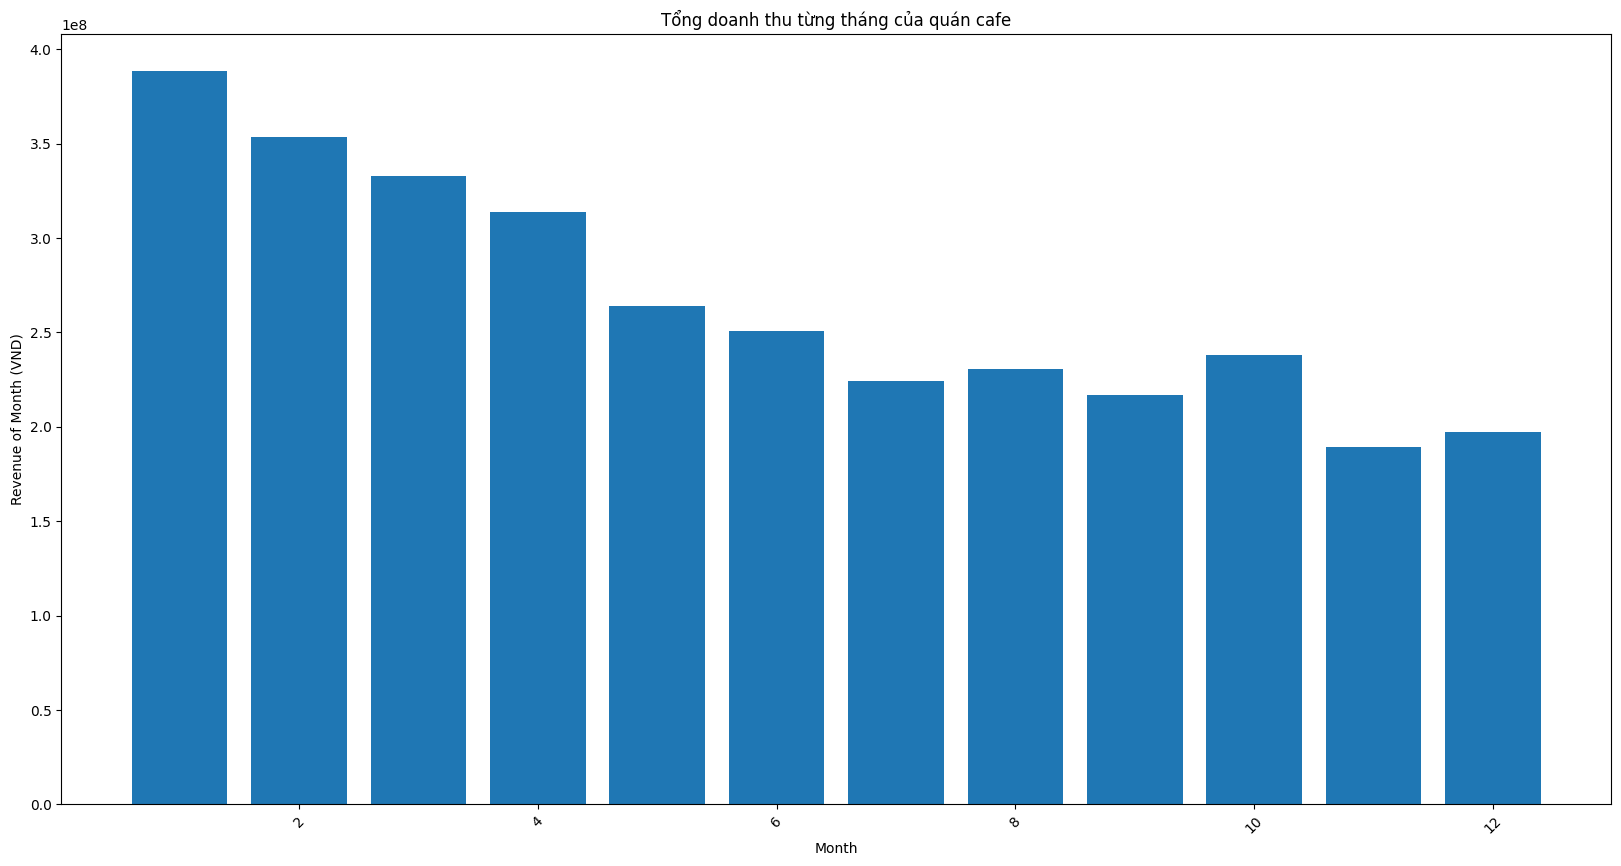

In [30]:

plt.figure(figsize =(20, 10))
plt.bar(monthly_revenues['Month'], monthly_revenues['Revenue of Month (VND)'])
plt.xlabel('Month')
plt.ylabel('Revenue of Month (VND)')
plt.title('Tổng doanh thu từng tháng của quán cafe')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# Hàm tính chi phí hàng tháng dựa vào tần suất chi phí
def calculate_monthly_expense(row):
    if row['Frequency'] == 'Hàng tháng':
        return row['Cost (VND)']
    elif row['Frequency'] == 'Nửa năm':
        return row['Cost (VND)'] / 6  # Chia chi phí theo quý cho 3 để tính trung bình mỗi tháng
    else:
        return 0  # Bỏ qua chi phí "Theo nhu cầu"

# Thêm giai đoạn dịch bệnh vào chi phí nguyên liệu
def calculate_special_month_expense(row, current_year, current_month):
    # Điều chỉnh chi phí cho tháng 12 (giáng sinh, cuối năm)
    if row['Item'] == 'Chi phí marketing' and current_month == 12:
        return row['Cost (VND)'] * 1.2  # Tăng 20% chi phí marketing vào tháng 12
    
    # Điều chỉnh chi phí nguyên liệu trong giai đoạn dịch bệnh
    if row['Category'] == 'Nguyên liệu chính':
        # Từ tháng 2/2020 đến tháng 10/2021: tăng 15% do dịch bệnh
        if (current_year == 2020 and current_month >= 2) or (current_year == 2021 and current_month <= 10):
            return row['Cost (VND)'] * 1.3
        # Từ tháng 11/2021 đến hết năm 2022: giảm nhẹ (chỉ còn tăng 5% so với bình thường)
        elif (current_year == 2022 ) or current_year == 2023:
            return row['Cost (VND)'] * 1.05
    
    # Các chi phí bình thường cho các tháng khác
    return calculate_monthly_expense(row)

# Tạo DataFrame để lưu kết quả chi phí hàng tháng
monthly_expenses = pd.DataFrame(columns=['Year', 'Month', 'Total Monthly Expense (VND)'])

# Vòng lặp qua các năm và các tháng từ 1 đến 12
for year in range(2019, 2024):  # Từ 2019 đến 2023
    for month in range(1, 13):  # Từ tháng 1 đến tháng 12
        # Tính toán chi phí hàng tháng
        df_costs['Monthly Cost (VND)'] = df_costs.apply(lambda row: calculate_special_month_expense(row, year, month), axis=1)
        
        # Điều chỉnh chi phí điện nước cho các tháng mùa hè (5-9)
        if month in [5, 6, 7, 8, 9]:
            df_costs.loc[df_costs['Item'] == 'Tiền điện', 'Monthly Cost (VND)'] *= 1.1  # Tăng 10% chi phí điện trong mùa hè
        
        # Tính tổng chi phí cho tháng hiện tại
        total_monthly_expense = df_costs['Monthly Cost (VND)'].sum()
        
        # Lưu kết quả vào DataFrame bằng cách sử dụng concat thay vì append
        monthly_expenses = pd.concat([monthly_expenses, pd.DataFrame({'Year': [year], 'Month': [month], 'Total Monthly Expense (VND)': [total_monthly_expense]})], ignore_index=True)

# Hiển thị tổng chi phí hàng tháng theo từng năm
monthly_expenses.head(5)

,Year,Month,Total Monthly Expense (VND)
0,2019,1,56900000.0
1,2019,2,56900000.0
2,2019,3,56900000.0
3,2019,4,56900000.0
4,2019,5,57180000.0


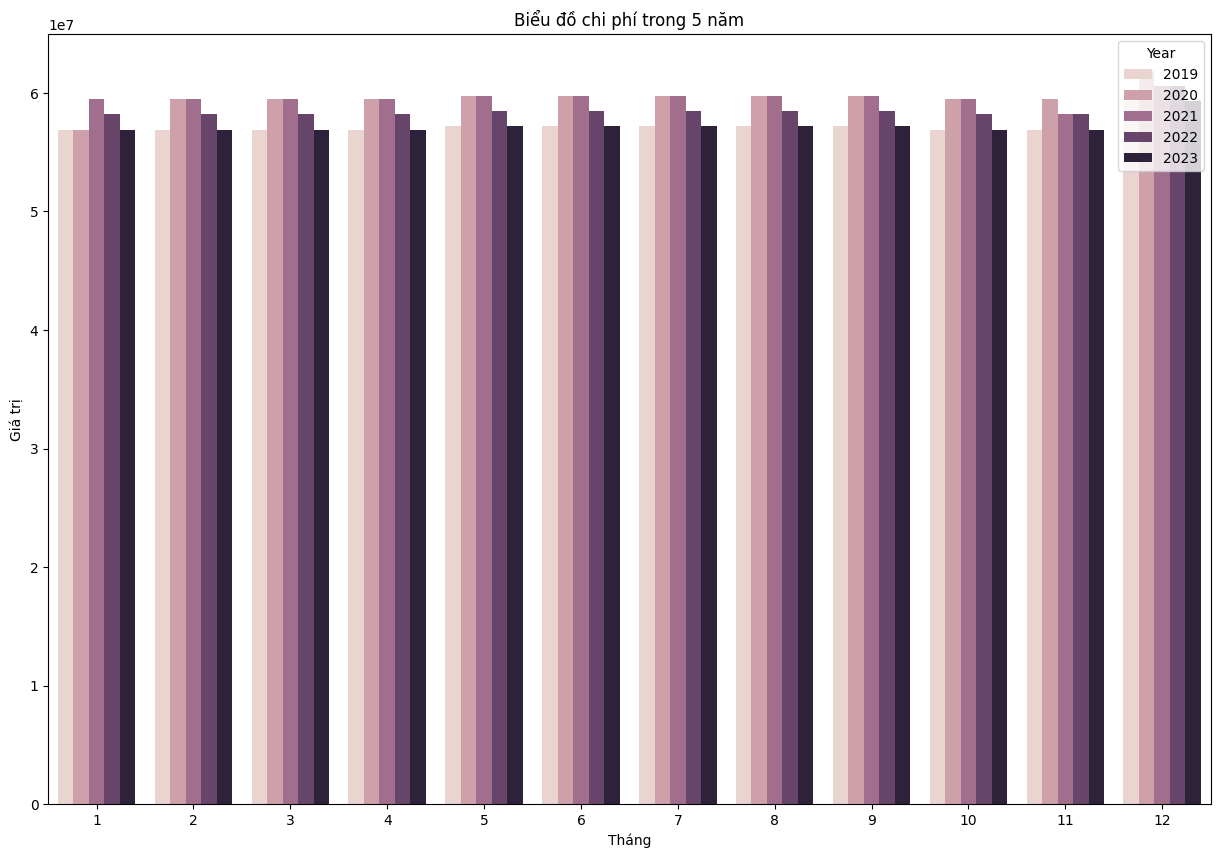

In [38]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Month', y='Total Monthly Expense (VND)', hue='Year', data=monthly_expenses)
plt.title('Biểu đồ chi phí trong 5 năm')
plt.xlabel('Tháng')
plt.ylabel('Giá trị')
plt.show()

In [45]:
# Tính doanh thu của từng tháng

data_revenue_merge = pd.merge(monthly_revenues, monthly_expenses, on=['Year', 'Month'], how='left')


data_revenue_merge['Total Revenue of Month (VND)'] = data_revenue_merge['Revenue of Month (VND)'] - data_revenue_merge['Total Monthly Expense (VND)']
total_month_revenue = data_revenue_merge.groupby(['Month', 'Year'])['Total Revenue of Month (VND)'].sum().reset_index()

total_month_revenue



,Month,Year,Total Revenue of Month (VND)
0,1,2019,331594000.0
1,1,2020,95576500.0
2,1,2021,5053000.0
3,1,2022,2018000.0
4,1,2023,-29007750.0
5,2,2019,296885000.0
6,2,2020,34940000.0
7,2,2021,-1422500.0
8,2,2022,-1445000.0
9,2,2023,-31546000.0
